In [1]:
import tensorflow as tf
import keras.layers as tfkl
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization
from keras.layers import Conv2D,MaxPooling2D
import os
import matplotlib.pyplot as plt

In [2]:
# Check GPU Avaialability
tf.test.is_built_with_cuda()

True

In [3]:
# Constants for the model
NUM_CLASSES = 5
CLASSES = ["Angry", "Happy", "Neutral", "sad", "Suprise"]
IMG_ROWS = 48
IMG_COLS = 48

num_train_samples = 24176
num_validation_samples = 3006

# Hyperparams
batch_size = 64

In [4]:
# Data Directory (FER2013 downloaded locally on Mark's Laptop)
TRAIN_DATA_DIR = r"C:\Users\markd\Documents\fer2013\train"
VAL_DATA_DIR = r"C:\Users\markd\Documents\fer2013\validation"

In [5]:
# Image augmentation
# only augment the training set but normalize both inputs
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    shear_range=0.3,
    zoom_range=0.3,
    width_shift_range=0.4,
    height_shift_range=0.4,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
# Define Generators
train_generator = train_datagen.flow_from_directory(
 TRAIN_DATA_DIR,
 color_mode='grayscale',
 target_size=(IMG_ROWS,IMG_COLS),
 batch_size=batch_size,
 class_mode='categorical',
 shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
 VAL_DATA_DIR,
 color_mode='grayscale',
 target_size=(IMG_ROWS,IMG_COLS),
 batch_size=batch_size,
 class_mode='categorical',
 shuffle=True)

Found 24256 images belonging to 5 classes.
Found 3006 images belonging to 5 classes.


In [7]:
# Helper functions for after training
def plot_loss(hist):
    plt.title("")
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.xlabel("# Epochs")
    plt.ylabel("Loss")
    plt.show()

# Plot results
def plot_acc(hist):
    plt.title("")
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.xlabel("# Epochs")
    plt.ylabel("accuracy")
    plt.show()

In [8]:
# Define Sequential Model
model = Sequential([
    ## CONV LAYERS 
    # Block 1
    Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal', input_shape=(IMG_ROWS,IMG_COLS,1)),
    Activation('elu'),
    BatchNormalization(),
    Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal'),
    Activation('elu'),
    BatchNormalization(),
    Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'),
    Activation('elu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.3),

    # Block 2
    Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'),
    Activation('elu'),
    BatchNormalization(),
    Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'),
    Activation('elu'),
    BatchNormalization(),
    Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'),
    Activation('elu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.3),

    # Block 3
    Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'),
    Activation('elu'),
    BatchNormalization(),
    Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'),
    Activation('elu'),
    BatchNormalization(),
    Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'),
    Activation('elu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.3),

    # Block 4
    Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'),
    Activation('elu'),
    BatchNormalization(),
    Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'),
    Activation('elu'),
    BatchNormalization(),
    Conv2D(512,(3,3),padding='same',kernel_initializer='he_normal'),
    Activation('elu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.3),

    ## FC LAYERS
    # Block 5
    Flatten(),
    Dense(64,kernel_initializer='he_normal'),
    Activation('elu'),
    BatchNormalization(),
    Dropout(0.5),

    # Block 6
    Flatten(),
    Dense(64,kernel_initializer='he_normal'),
    Activation('elu'),
    BatchNormalization(),
    Dropout(0.5),

    # Block 7
    Dense(NUM_CLASSES,kernel_initializer='he_normal'),
    Activation('softmax'),
])

In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               loss='categorical_crossentropy',
               metrics='accuracy')
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 48, 48, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 48, 48, 32)       128       
 hNormalization)                                        

In [14]:
# Fit data
epochs = 25
history = model.fit_generator(
    train_generator,
    steps_per_epoch = num_train_samples // batch_size,
    epochs=epochs,
    validation_data = validation_generator,
    validation_steps = num_validation_samples // batch_size, 
)

Epoch 1/25
  1/377 [..............................] - ETA: 36s - loss: 0.9520 - accuracy: 0.6875

C:\Users\markd\AppData\Local\Temp\ipykernel_17124\4091066646.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


377/377 [==============================] - 18s 46ms/step - loss: 0.8805 - accuracy: 0.6710 - val_loss: 1.2639 - val_accuracy: 0.6270
Epoch 2/25
377/377 [==============================] - 18s 47ms/step - loss: 0.8812 - accuracy: 0.6646 - val_loss: 1.1882 - val_accuracy: 0.6165
Epoch 3/25
377/377 [==============================] - 17s 46ms/step - loss: 0.8725 - accuracy: 0.6705 - val_loss: 1.1515 - val_accuracy: 0.6223
Epoch 4/25
377/377 [==============================] - 18s 47ms/step - loss: 0.8779 - accuracy: 0.6673 - val_loss: 1.2384 - val_accuracy: 0.6151
Epoch 5/25
377/377 [==============================] - 19s 49ms/step - loss: 0.8759 - accuracy: 0.6712 - val_loss: 1.3233 - val_accuracy: 0.6291
Epoch 6/25
377/377 [==============================] - 19s 49ms/step - loss: 0.8745 - accuracy: 0.6676 - val_loss: 1.1632 - val_accuracy: 0.6359
Epoch 7/25
377/377 [==============================] - 18s 47ms/step - loss: 0.8592 - accuracy: 0.6732 - val_loss: 1.2329 - val_accuracy: 0.6325
Epo

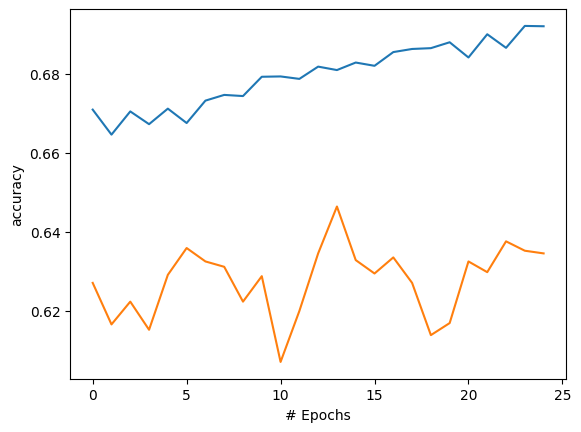

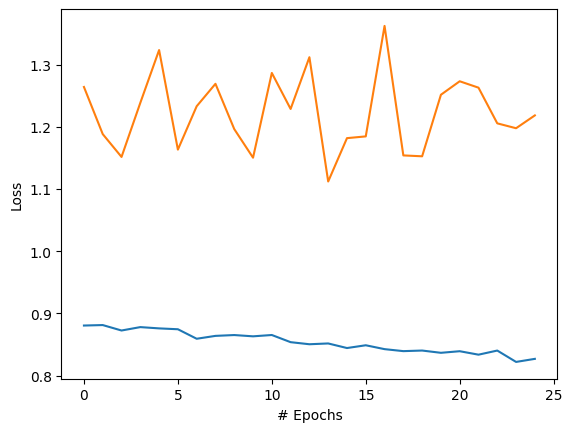

In [15]:
plot_acc(history)
plot_loss(history)

In [12]:
model.save(r"C:\Users\markd\Documents\GitHub\ECG\CV_display\emotion_model", save_format="h5")